In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
import sympy as sp
# %matplotlib inline

In [2]:
def choose(choice):
    if choice==1:
        def f(x,y):
            return (-2*(x**3)) + (12*(x**2)) - (20*x) + 8.5
        
        def Anf(xo,xn,h,N):
            x = np.arange(xo,xn,h)
            y = (-0.5*(x**4)) + (4*(x**3)) - (10*(x**2)) + (8.5*x) + 1
            if N==1:
                plt.plot(x,y,color='black',label='Analytical Solution')
                plt.legend()
            else:
                return x,y
    else:
        def f(x,y):
            return 4*np.exp(0.8*x)-0.5*y
        
        def Anf(xo,xn,h,N):
            x = np.arange(xo,xn,h)
            y=(4/1.3)*np.exp(0.8*x)-1.077*np.exp(-0.5*x)
            if N==1:
                plt.plot(x,y,color='black',label='Analytical Solution')
                plt.legend()
            else:
                return x,y
    return f , Anf

In [3]:
def Euler_method(xo,yo,xn,h,N):
#     n=int((xn-xo)/h)
#     x = np.linspace(xo,xn,n)
    x = np.arange(xo,xn,h)
    y = np.zeros(x.size)
    y[0] = yo
    for i in range(1, x.size):
        y[i] = y[i-1] + f(x[i-1],y[i-1])*h
        
    if N==1:    
        plt.plot(x,y,color='red',label='Euler_method')
        plt.legend()
    else:
        return y
        

In [4]:
def Heuns_method(xo,yo,xn,h,N):
#     n=int((xn-xo)/h)
#     x = np.linspace(xo,xn,n)
    x = np.arange(xo,xn,h)
    y = np.zeros(x.size)
    y[0] = yo

    for i in range(1, x.size):
        y_intermediate = y[i-1] + h*f(x[i-1],y[i-1])

        y[i] = y[i-1] + (h/2.0)*(f(x[i-1],y[i-1]) + f(x[i],y_intermediate))
    if N==1:    
        plt.plot(x,y,color='maroon',label='Heuns_method')
        plt.legend()
    else:
        return y

In [5]:
def Midpoint_method(xo,yo,xn,h,N):
#     n=int((xn-xo)/h)
#     x = np.linspace(xo,xn,n)
    x = np.arange(xo,xn,h)
    y = np.zeros(x.size)
    y[0] = yo
    
    for i in range(1, x.size):
        y[i] = y[i-1] + h*f(x[i-1] + h/2, y[i-1] + (h/2.0)*f(x[i-1],y[i-1]))
    if N==1:
        plt.plot(x,y,color='green',label='Midpoint_method')
        plt.legend()
    else:
        return y

In [6]:
def RK_4_method(xo,yo,xn,h,N):
#     n=int((xn-xo)/h)
#     x = np.linspace(xo,xn,n)
    x = np.arange(xo,xn,h)
    y = np.zeros(x.size)                
    y[0] = yo               
    
    for i in range(1,x.size):              
        k1 = h * f( x[i-1], y[i-1] )
        k2 = h * f( x[i-1] + h / 2.0, y[i-1] + k1 / 2.0 )
        k3 = h * f( x[i-1] + h / 2.0, y[i-1] + k2 / 2.0 )
        k4 = h * f( x[i], y[i-1] + k3 )
        y[i] = y[i-1] + ( k1 + 2.0 * k2 + 2.0 * k3 + k4 ) / 6.0
    if N==1:    
        plt.plot(x,y,color='darkblue',label='RK_4')
        plt.legend()
    else:
        return y

# For 1st Function, Plotting & Error Analysis

In [7]:
choice=1
f, Anf = choose(choice)
xo=0
xn=151
yo=1
h_list=[50,37.525,25.05,12.575,0.1]

### Plotting

for h = 50-step size


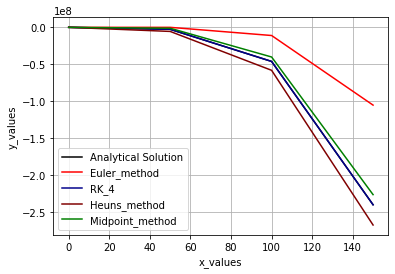

for h = 37.525-step size


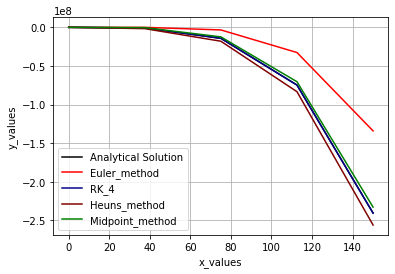

for h = 25.05-step size


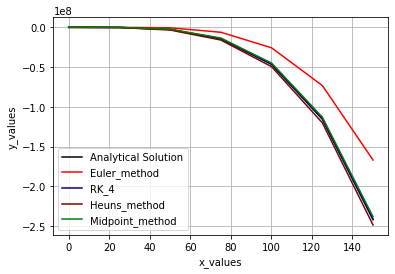

for h = 12.575-step size


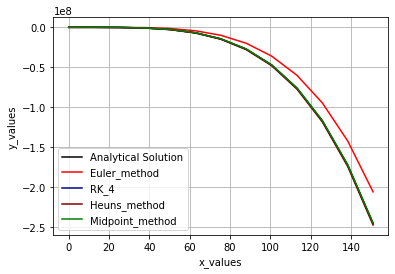

for h = 0.1-step size


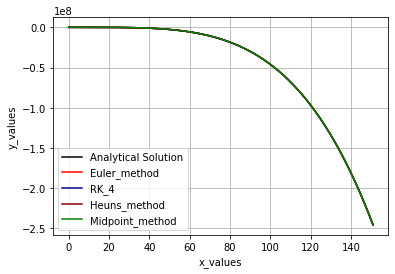

In [8]:
N=1 
for h in h_list:
    Anf(xo,xn,h,N)
    Euler_method(xo,yo,xn,h,N)
    RK_4_method(xo,yo,xn,h,N)
    Heuns_method(xo,yo,xn,h,N)
    Midpoint_method(xo,yo,xn,h,N)
    plt.xlabel("x_values")
    plt.ylabel("y_values")
    plt.title(print(f'for h = {h}-step size') )
    plt.grid()
    plt.show()

## Error

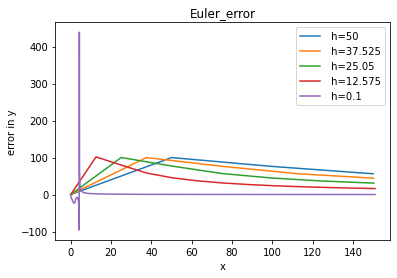

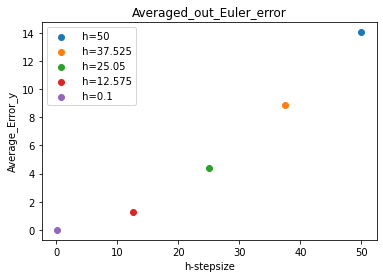

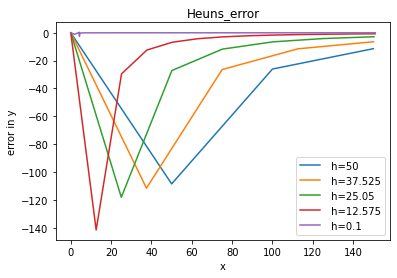

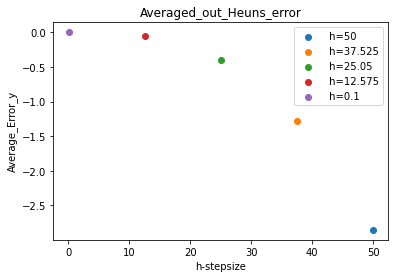

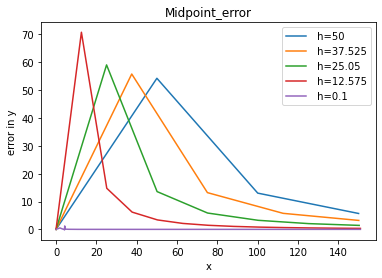

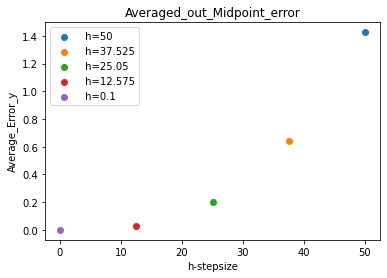

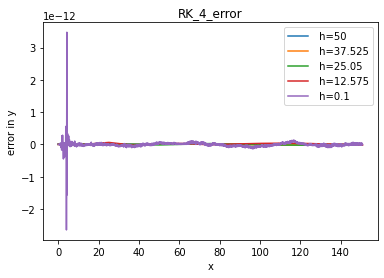

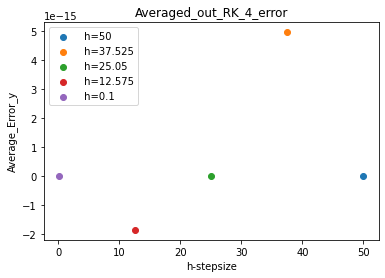

In [9]:
N=2
for h in h_list:
    xa,ya=Anf(xo,xn,h,N)
    ye=Euler_method(xo,yo,xn,h,N)
    dye=((ya-ye)/ya)*100
    dye=np.array(dye)
    plt.plot(xa,dye,label=f' h={h}')
    plt.title('Euler_error')
    plt.xlabel('x')
    plt.ylabel('error in y')
    plt.legend()    
plt.show()

for h in h_list:
    xa,ya=Anf(xo,xn,h,N)
    ye=Euler_method(xo,yo,xn,h,N)
    dye=((ya-ye)/ya)*100
    dye=np.array(dye)
    for i in dye:
        avgdye=0
        avgdye=avgdye+i

    avgdye=avgdye/len(dye)
    plt.scatter(h,avgdye,label=f' h={h}')
    plt.title('Averaged_out_Euler_error')
    plt.xlabel('h-stepsize')
    plt.ylabel('Average_Error_y')
    plt.legend()    
plt.show()
for h in h_list:
    xa,ya=Anf(xo,xn,h,N)
    yh=Heuns_method(xo,yo,xn,h,N)
    dyh=((ya-yh)/ya)*100
    dyh=np.array(dyh)
    plt.plot(xa,dyh,label=f' h={h}')
    plt.title('Heuns_error')
    plt.xlabel('x')
    plt.ylabel('error in y')
    plt.legend()
plt.show()

for h in h_list:
    xa,ya=Anf(xo,xn,h,N)
    yh=Heuns_method(xo,yo,xn,h,N)
    dyh=((ya-yh)/ya)*100
    dyh=np.array(dyh)
    for i in dyh:
        avgdyh=0
        avgdyh=avgdyh+i

    avgdyh=avgdyh/len(dyh)
    plt.scatter(h,avgdyh,label=f' h={h}')
    plt.title('Averaged_out_Heuns_error')
    plt.xlabel('h-stepsize')
    plt.ylabel('Average_Error_y')
    plt.legend()    
plt.show()

for h in h_list:
    xa,ya=Anf(xo,xn,h,N)
    ym=Midpoint_method(xo,yo,xn,h,N)
    dym=((ya-ym)/ya)*100
    dym=np.array(dym)
    plt.plot(xa,dym,label=f' h={h}')
    plt.title('Midpoint_error')
    plt.xlabel('x')
    plt.ylabel('error in y')
    plt.legend()
plt.show()

for h in h_list:
    xa,ya=Anf(xo,xn,h,N)
    ym=Midpoint_method(xo,yo,xn,h,N)
    dym=((ya-ym)/ya)*100
    dym=np.array(dym)
    for i in dym:
        avgdym=0
        avgdym=avgdym+i

    avgdym=avgdym/len(dym)
    plt.scatter(h,avgdym,label=f' h={h}')
    plt.title('Averaged_out_Midpoint_error')
    plt.xlabel('h-stepsize')
    plt.ylabel('Average_Error_y')
    plt.legend()    
plt.show()

for h in h_list:
    xa,ya=Anf(xo,xn,h,N)
    yrk=RK_4_method(xo,yo,xn,h,N)
    dyrk=((ya-yrk)/ya)*100
    dyrk=np.array(dyrk)
    plt.plot(xa,dyrk,label=f' h={h}')
    plt.title('RK_4_error')
    plt.xlabel('x')
    plt.ylabel('error in y')
    plt.legend()
plt.show()

for h in h_list:
    xa,ya=Anf(xo,xn,h,N)
    yrk=RK_4_method(xo,yo,xn,h,N)
    dyrk=((ya-yrk)/ya)*100
    dyrk=np.array(dyrk)
    for i in dyrk:
        avgdyrk=0
        avgdyrk=avgdyrk+i

    avgdyrk=avgdyrk/len(dyrk)
    plt.scatter(h,avgdyrk,label=f' h={h}')
    plt.title('Averaged_out_RK_4_error')
    plt.xlabel('h-stepsize')
    plt.ylabel('Average_Error_y')
    plt.legend()    
plt.show()


# For 2nd Function, Plotting & Error Analysis

In [10]:
choice=2
f, Anf = choose(choice)
xo=0
xn=11
yo=2
h_list=[5,3.775,2.55,1.325,0.1]

## Plotting

for h = 5-step size


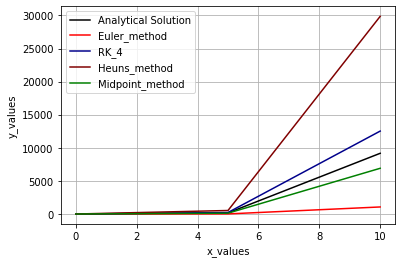

for h = 3.775-step size


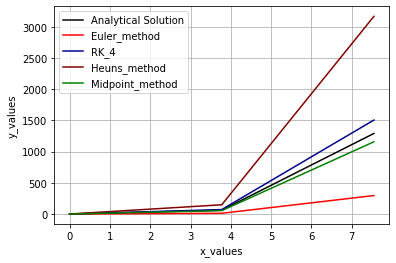

for h = 2.55-step size


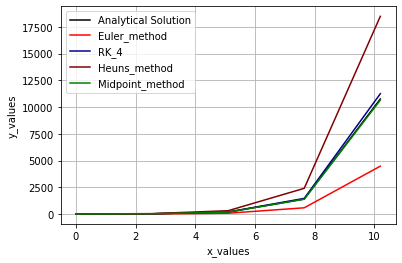

for h = 1.325-step size


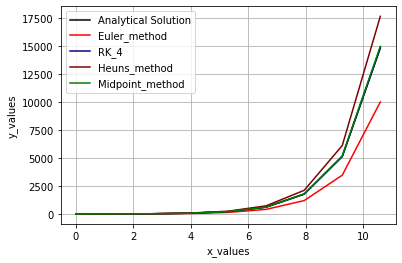

for h = 0.1-step size


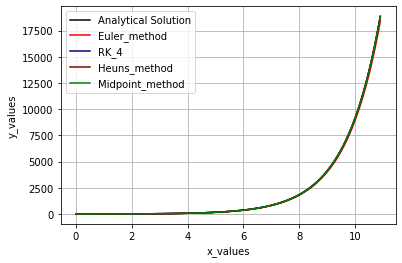

In [11]:
N=1
for h in h_list:
    Anf(xo,xn,h,N)
    Euler_method(xo,yo,xn,h,N)
    RK_4_method(xo,yo,xn,h,N)
    Heuns_method(xo,yo,xn,h,N)
    Midpoint_method(xo,yo,xn,h,N)
    plt.xlabel("x_values")
    plt.ylabel("y_values")
    plt.title(print(f'for h = {h}-step size') )
    plt.grid()
    plt.show()

## Error

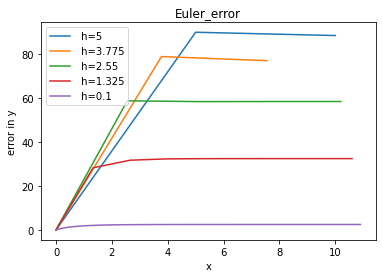

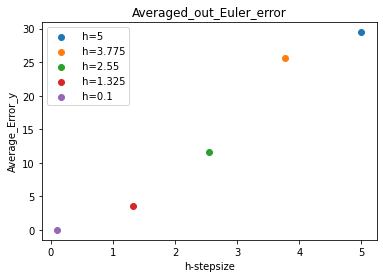

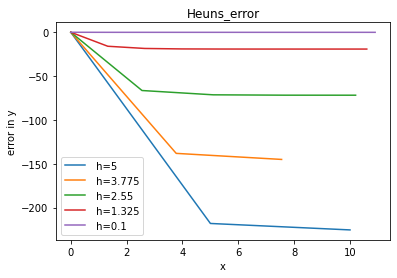

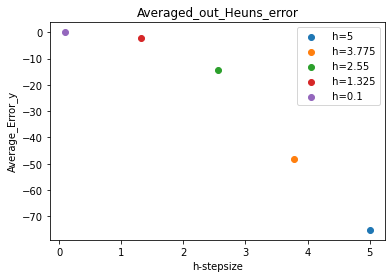

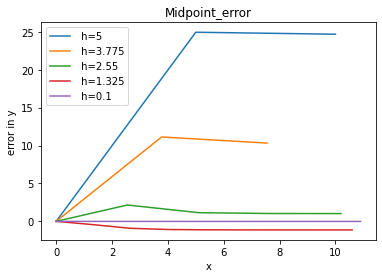

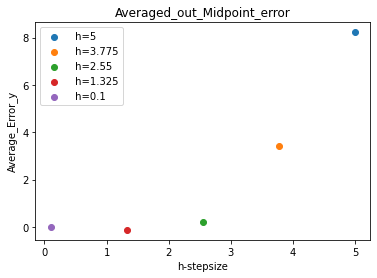

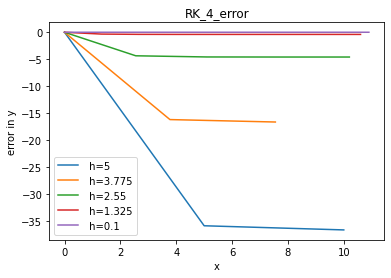

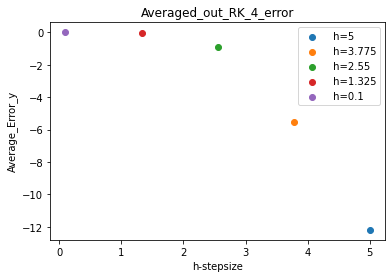

In [12]:
N=2
for h in h_list:
    xa,ya=Anf(xo,xn,h,N)
    ye=Euler_method(xo,yo,xn,h,N)
    dye=((ya-ye)/ya)*100
    dye=np.array(dye)
    plt.plot(xa,dye,label=f' h={h}')
    plt.title('Euler_error')
    plt.xlabel('x')
    plt.ylabel('error in y')
    plt.legend()    
plt.show()

for h in h_list:
    xa,ya=Anf(xo,xn,h,N)
    ye=Euler_method(xo,yo,xn,h,N)
    dye=((ya-ye)/ya)*100
    dye=np.array(dye)
    for i in dye:
        avgdye=0
        avgdye=avgdye+i

    avgdye=avgdye/len(dye)
    plt.scatter(h,avgdye,label=f' h={h}')
    plt.title('Averaged_out_Euler_error')
    plt.xlabel('h-stepsize')
    plt.ylabel('Average_Error_y')
    plt.legend()    
plt.show()
for h in h_list:
    xa,ya=Anf(xo,xn,h,N)
    yh=Heuns_method(xo,yo,xn,h,N)
    dyh=((ya-yh)/ya)*100
    dyh=np.array(dyh)
    plt.plot(xa,dyh,label=f' h={h}')
    plt.title('Heuns_error')
    plt.xlabel('x')
    plt.ylabel('error in y')
    plt.legend()
plt.show()

for h in h_list:
    xa,ya=Anf(xo,xn,h,N)
    yh=Heuns_method(xo,yo,xn,h,N)
    dyh=((ya-yh)/ya)*100
    dyh=np.array(dyh)
    for i in dyh:
        avgdyh=0
        avgdyh=avgdyh+i

    avgdyh=avgdyh/len(dyh)
    plt.scatter(h,avgdyh,label=f' h={h}')
    plt.title('Averaged_out_Heuns_error')
    plt.xlabel('h-stepsize')
    plt.ylabel('Average_Error_y')
    plt.legend()    
plt.show()

for h in h_list:
    xa,ya=Anf(xo,xn,h,N)
    ym=Midpoint_method(xo,yo,xn,h,N)
    dym=((ya-ym)/ya)*100
    dym=np.array(dym)
    plt.plot(xa,dym,label=f' h={h}')
    plt.title('Midpoint_error')
    plt.xlabel('x')
    plt.ylabel('error in y')
    plt.legend()
plt.show()

for h in h_list:
    xa,ya=Anf(xo,xn,h,N)
    ym=Midpoint_method(xo,yo,xn,h,N)
    dym=((ya-ym)/ya)*100
    dym=np.array(dym)
    for i in dym:
        avgdym=0
        avgdym=avgdym+i

    avgdym=avgdym/len(dym)
    plt.scatter(h,avgdym,label=f' h={h}')
    plt.title('Averaged_out_Midpoint_error')
    plt.xlabel('h-stepsize')
    plt.ylabel('Average_Error_y')
    plt.legend()    
plt.show()

for h in h_list:
    xa,ya=Anf(xo,xn,h,N)
    yrk=RK_4_method(xo,yo,xn,h,N)
    dyrk=((ya-yrk)/ya)*100
    dyrk=np.array(dyrk)
    plt.plot(xa,dyrk,label=f' h={h}')
    plt.title('RK_4_error')
    plt.xlabel('x')
    plt.ylabel('error in y')
    plt.legend()
plt.show()

for h in h_list:
    xa,ya=Anf(xo,xn,h,N)
    yrk=RK_4_method(xo,yo,xn,h,N)
    dyrk=((ya-yrk)/ya)*100
    dyrk=np.array(dyrk)
    for i in dyrk:
        avgdyrk=0
        avgdyrk=avgdyrk+i

    avgdyrk=avgdyrk/len(dyrk)
    plt.scatter(h,avgdyrk,label=f' h={h}')
    plt.title('Averaged_out_RK_4_error')
    plt.xlabel('h-stepsize')
    plt.ylabel('Average_Error_y')
    plt.legend()    
plt.show()


# Physical System

In [13]:
# dv/dt = f(t,v) = g - (k/m)v          -----1
'''vt=(m*g)/k''' # Terminal velocity
#Rearranging the above equation
# k/m = g/vt
# substituting in eq1
# dv/dt = g - (g/vt)v
# dv/dt = f(t,v) = g - (g/vt)v
# v = vt(1-e^(-gt))

def f(t,v):
    return g*(1-(v/vt))

def Anf(to,tn,h,N):
    t = np.arange(to,tn,h)
    v = vt - ((vt-vo)*np.exp(-g*t/vt))
    if N==1:
        plt.plot(t,v,color='black',label='Analytical Solution')
        plt.legend()
    else:
        return t,v

In [14]:
to=0 # replace for xo
tn=101 # ideally infinity, replace for xn
vo=1 # replace for yo
g=9.8
m=1
vt=120
h_list=[20,10,5,0.1]

for h = 20-step size


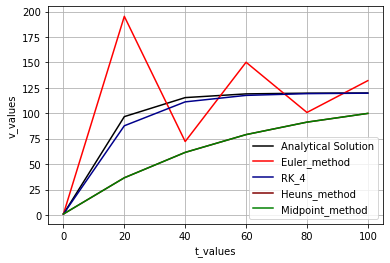

for h = 10-step size


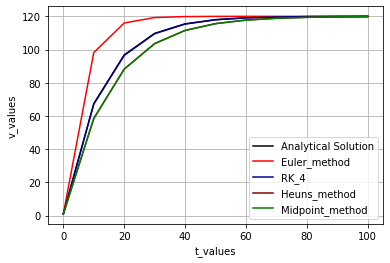

for h = 5-step size


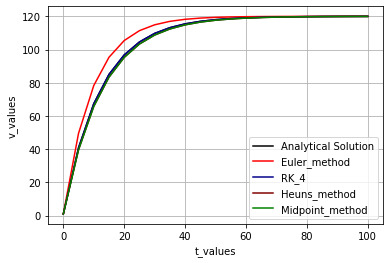

for h = 0.1-step size


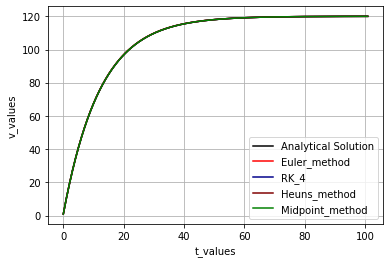

In [15]:
N=1
for h in h_list:
    Anf(to,tn,h,N)
    Euler_method(to,vo,tn,h,N)
    RK_4_method(to,vo,tn,h,N)
    Heuns_method(to,vo,tn,h,N)
    Midpoint_method(to,vo,tn,h,N)
    plt.xlabel("t_values")
    plt.ylabel("v_values")
    plt.title(print(f'for h = {h}-step size') )
    plt.grid()
    plt.show()


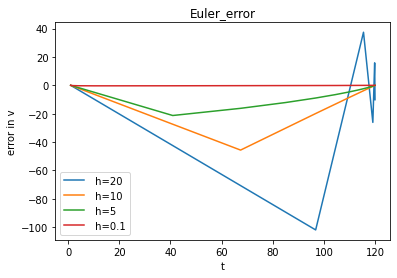

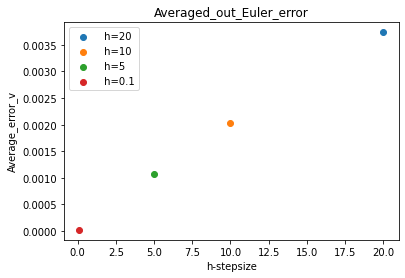

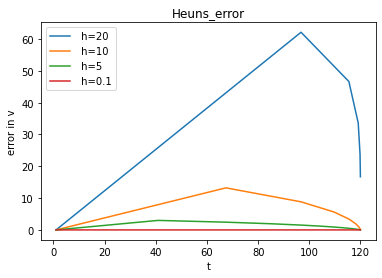

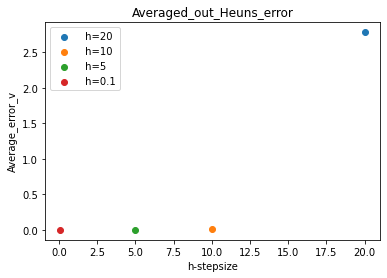

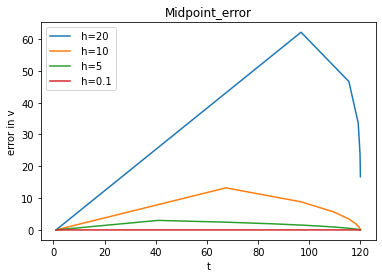

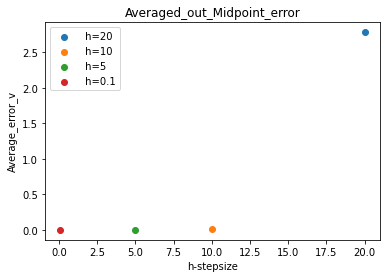

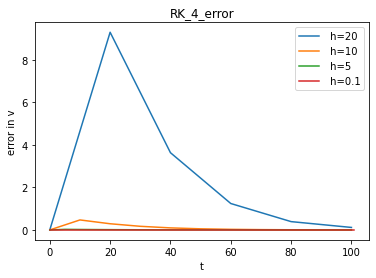

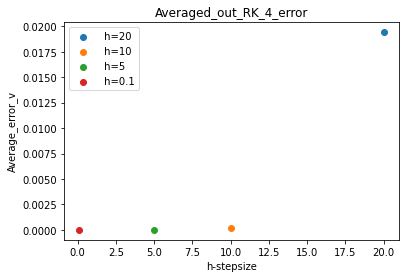

In [16]:
N=2
for h in h_list:
    ta,va=Anf(to,tn,h,N)
    ve=Euler_method(to,vo,tn,h,N)
    dve=((va-ve)/va)*100
    dve=np.array(dve)
    plt.plot(va,dve,label=f' h={h}')
    plt.title('Euler_error')
    plt.xlabel('t')
    plt.ylabel('error in v')
    plt.legend()    
plt.show()

for h in h_list:
    ta,va=Anf(to,tn,h,N)
    ve=Euler_method(to,vo,tn,h,N)
    dve=((va-ve)/va)*100
    dve=np.array(dve)
    for i in dve:
        avgdve=0
        avgdve=avgdve+i

    avgdve=avgdye/len(dve)
    plt.scatter(h,avgdve,label=f' h={h}')
    plt.title('Averaged_out_Euler_error')
    plt.xlabel('h-stepsize')
    plt.ylabel('Average_error_v')
    plt.legend()  
plt.show()

for h in h_list:
    ta,va=Anf(to,tn,h,N)
    vh=Heuns_method(to,vo,tn,h,N)
    dvh=((va-vh)/va)*100
    dvh=np.array(dvh)
    plt.plot(va,dvh,label=f' h={h}')
    plt.title('Heuns_error')
    plt.xlabel('t')
    plt.ylabel('error in v')
    plt.legend()
plt.show()

for h in h_list:
    ta,va=Anf(to,tn,h,N)
    vh=Heuns_method(to,vo,tn,h,N)
    dvh=((va-vh)/va)*100
    dvh=np.array(dvh)
    for i in dvh:
        avgdvh=0
        avgdvh=avgdvh+i

    avgdvh=avgdvh/len(dvh)
    plt.scatter(h,avgdvh,label=f' h={h}')
    plt.title('Averaged_out_Heuns_error')
    plt.xlabel('h-stepsize')
    plt.ylabel('Average_error_v')
    plt.legend() 
plt.show()

for h in h_list:
    ta,va=Anf(to,tn,h,N)
    vm=Midpoint_method(to,vo,tn,h,N)
    dvm=((va-vm)/va)*100
    dvm=np.array(dvm)
    plt.plot(va,dvm,label=f' h={h}')
    plt.title('Midpoint_error')
    plt.xlabel('t')
    plt.ylabel('error in v')
    plt.legend()
plt.show()

for h in h_list:
    ta,va=Anf(to,tn,h,N)
    vm=Midpoint_method(to,vo,tn,h,N)
    dvm=((va-vm)/va)*100
    dvm=np.array(dvm)
    for i in dvm:
        avgdvm=0
        avgdvm=avgdvm+i

    avgdvm=avgdvm/len(dvm)
    plt.scatter(h,avgdvm,label=f' h={h}')
    plt.title('Averaged_out_Midpoint_error')
    plt.xlabel('h-stepsize')
    plt.ylabel('Average_error_v')
    plt.legend() 
plt.show()

for h in h_list:
    ta,va=Anf(to,tn,h,N)
    vrk=RK_4_method(to,vo,tn,h,N)
    dvrk=((va-vrk)/va)*100
    dvrk=np.array(dvrk)
    plt.plot(ta,dvrk,label=f' h={h}')
    plt.title('RK_4_error')
    plt.xlabel('t')
    plt.ylabel('error in v')
    plt.legend()
plt.show()

for h in h_list:
    ta,va=Anf(to,tn,h,N)
    vrk=RK_4_method(to,vo,tn,h,N)
    dvrk=((va-vrk)/va)*100
    dvrk=np.array(dvrk)
    for i in dvrk:
        avgdvrk=0
        avgdvrk=avgdvrk+i

    avgdvrk=avgdvrk/len(dvrk)
    plt.scatter(h,avgdvrk,label=f' h={h}')
    plt.title('Averaged_out_RK_4_error')
    plt.xlabel('h-stepsize')
    plt.ylabel('Average_error_v')
    plt.legend() 
plt.show()


In [17]:
# # f(a+h) = f(a) + hf'(a) + (h^2/2)f''(a) + .......
# # Taylor series

# a,x,y=sp.symbols('a,x,y')
# f=sp.Function('f')(x)
# l=sp.Eq(f,x**2)
# display(l)
# n=int(input('n= '))
# y=l.rhs.diff(x,n)
# y

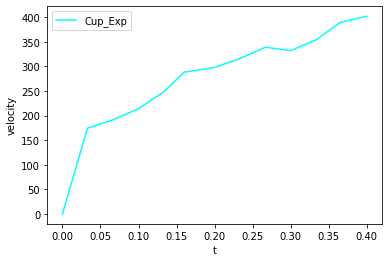

After Interpolation 




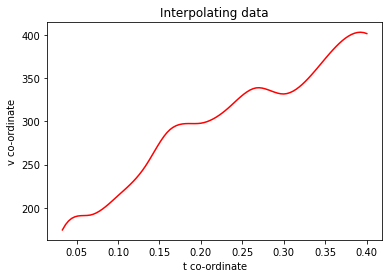

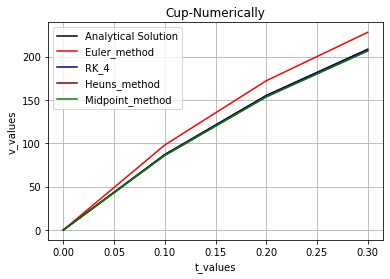

After Curve_fitting 




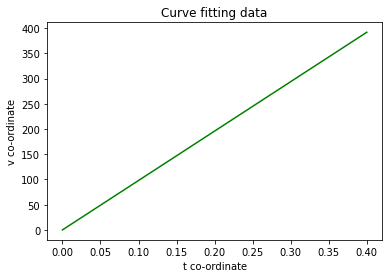

In [18]:
t = np.array([0,0.033,0.067,0.1,0.133,0.16,0.2,0.233,0.267,0.3,0.333,0.366,0.4])

vce = np.array([0,-174.3, -191.6, -214, -248.1, -288.1, -298, -315.6, -339, -331.9, -353.7, -389.8, -401.9 ])
vce = (-1)*vce 

plt.plot(t,vce,label="Cup_Exp",color="aqua")
plt.xlabel("t")
plt.ylabel("velocity")
plt.legend()
plt.show()

# Interpolating the data obtained  for Cup.
Interpolate_c= interp1d(t,vce,"cubic")
t = np.linspace(0.033,0.4,100)
vce= Interpolate_c(t)
print("After Interpolation ")
print('\n')
plt.plot(t,vce,color="red")
plt.title("Interpolating data")
plt.xlabel('t co-ordinate')
plt.ylabel('v co-ordinate')
plt.show()

# Using constant vt obtained from interpolation and  
N=1
to=0
tn=0.4
vo=0
g=980
m=1.5
vt=400
h=0.1
Anf(to,tn,h,N)
Euler_method(to,vo,tn,h,N)
RK_4_method(to,vo,tn,h,N)
Heuns_method(to,vo,tn,h,N)
Midpoint_method(to,vo,tn,h,N)
plt.xlabel("t_values")
plt.ylabel("v_values")
# plt.title(print(f'for h = {h}-step size') )
plt.title('Cup-Numerically')
plt.grid()
plt.show()

# v = vt - ((vt-vo)*np.exp(-g*t/vt))
# Curve_fitting.
def func_c(t,vt):
    vo=0
    return vt - ((vt-vo)*np.exp(-g*t/vt))
popt , pcov= curve_fit(func_c , t , vce , p0=(400))
vt= popt

t = np.linspace(0,0.4,10)
vce = vt - ((vt-vo)*np.exp(-g*t/vt))
print("After Curve_fitting ")
print('\n')
plt.title("Curve fitting data")
plt.xlabel('t co-ordinate')
plt.ylabel('v co-ordinate')
plt.plot(t,vce,color="green")

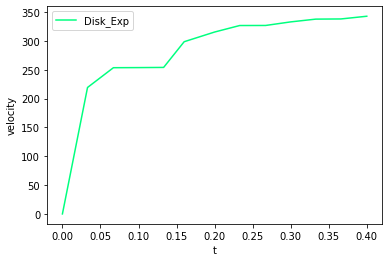

After Interpolation 




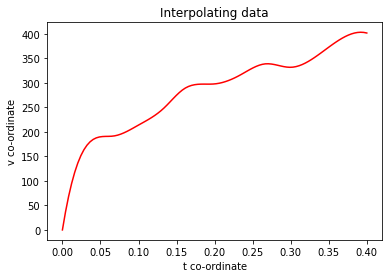

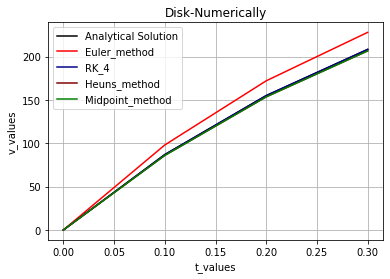

After Curve_fitting 




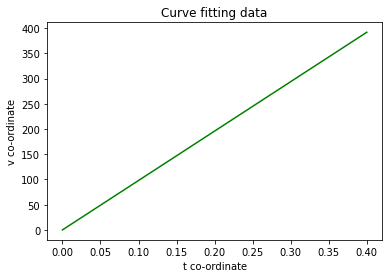

In [19]:
t = np.array([0,0.033,0.067,0.1,0.133,0.16,0.2,0.233,0.267,0.3,0.333,0.366,0.4])

vcd = np.array([0,-219.4, -253.7, -253.9, -254.2, -298.8, -315.6, -326.9, -327, -333.2, -338, -338.3, -343 ])
vcd = (-1)*vcd

plt.plot(t,vcd,label="Disk_Exp",color="springgreen")
plt.xlabel("t")
plt.ylabel("velocity")
plt.legend()
plt.show()

# Interpolating the data obtained  for Cup.
Interpolate_d= interp1d(t,vcd,"linear")
t = np.linspace(0,0.4,100)
vcd= Interpolate_c(t)
print("After Interpolation ")
print('\n')
plt.plot(t,vcd,color="red")
plt.title("Interpolating data")
plt.xlabel('t co-ordinate')
plt.ylabel('v co-ordinate')
plt.show()

# Using constant vt obtained from interpolation and using numerical methods
N=1
to=0
tn=0.4
vo=0
g=980
m=1.5
vt=400
h=0.1
Anf(to,tn,h,N)
Euler_method(to,vo,tn,h,N)
RK_4_method(to,vo,tn,h,N)
Heuns_method(to,vo,tn,h,N)
Midpoint_method(to,vo,tn,h,N)
plt.xlabel("t_values")
plt.ylabel("v_values")
# plt.title(print(f'for h = {h}-step size') )
plt.title('Disk-Numerically')
plt.grid()
plt.show()

# v = vt - ((vt-vo)*np.exp(-g*t/vt))
# Curve_fitting.
def func_d(t,vt):
    vo=0
    return vt - ((vt-vo)*np.exp(-g*t/vt))
popt , pcov= curve_fit(func_d , t , vcd , p0=(400))
vt= popt

t = np.linspace(0,0.4,10)
vcd = vt - ((vt-vo)*np.exp(-g*t/vt))
print("After Curve_fitting ")
print('\n')
plt.title("Curve fitting data")
plt.xlabel('t co-ordinate')
plt.ylabel('v co-ordinate')
plt.plot(t,vcd,color="green")

In [20]:
# Taylor Series
x,y,n=sp.symbols('x,y,n')
f=sp.Function('f')(x)
p=(x**2)*sp.exp(x)
q=sp.Eq(f,p)
q.rhs

for n in range(3):
    fd=0
    fd=fd+(q.rhs.diff(x,n))/(sp.factorial(n))
fd=fd+q.rhs
fd

x**2*exp(x) + (x**2 + 4*x + 2)*exp(x)/2

In [21]:
sp.factorial(n)

2